<a href="https://colab.research.google.com/github/ayanmmm/House_Price_Prediction/blob/main/Chennai_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

**Minimum Requirements**
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

In [186]:
#Libraries
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score




In [187]:
#Load data set
df=pd.read_csv("https://raw.githubusercontent.com/ayanmmm/House_Price_Prediction/main/train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [188]:
df.shape 

(7109, 22)

In [189]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [190]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [191]:
#Null values present in

# N_BEDROOM         1
# N_BATHROOM        5
# QS_OVERALL       48

In [192]:
df["N_BATHROOM"].describe()

count    7104.000000
mean        1.213260
std         0.409639
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [193]:
df['N_BATHROOM']=df["N_BATHROOM"].fillna(df["N_BATHROOM"].mode()[0])

In [194]:
df["N_BEDROOM"].describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [195]:
df['N_BEDROOM']=df["N_BEDROOM"].fillna(df["N_BEDROOM"].mode()[0])

In [196]:
df["QS_OVERALL"].describe()

count    7061.000000
mean        3.503254
std         0.527223
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [197]:
df['QS_OVERALL']=df["QS_OVERALL"].fillna(df["QS_OVERALL"].mean())

In [198]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [199]:
#All null values removed

In [200]:
df.duplicated().sum()

0

In [201]:
#no Duplicate value present

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [203]:
#0   AREA           7109 non-null   object 
#2   DATE_SALE      7109 non-null   object 
#7   SALE_COND      7109 non-null   object 
#8   PARK_FACIL     7109 non-null   object 
#9   DATE_BUILD     7109 non-null   object 
#10  BUILDTYPE      7109 non-null   object 
#11  UTILITY_AVAIL  7109 non-null   object 
#12  STREET         7109 non-null   object 
#13  MZZONE         7109 non-null   object 

In [204]:
df.AREA.describe()

count         7109
unique          17
top       Chrompet
freq          1681
Name: AREA, dtype: object

In [205]:
sorted(df["AREA"].unique()) #spelling mistake in AREA column

['Adyar',
 'Adyr',
 'Ana Nagar',
 'Ann Nagar',
 'Anna Nagar',
 'Chormpet',
 'Chrmpet',
 'Chrompet',
 'Chrompt',
 'KK Nagar',
 'KKNagar',
 'Karapakam',
 'Karapakkam',
 'T Nagar',
 'TNagar',
 'Velachery',
 'Velchery']

In [206]:
df['AREA']=df['AREA'].replace(['Adyr'],'Adyar')
df['AREA']=df['AREA'].replace(['Ana Nagar','Ann Nagar'],'Anna Nagar')
df['AREA']=df['AREA'].replace(['Chormpet','Chrmpet','Chrompet','Chrompt',],'chromepet')
df['AREA']=df['AREA'].replace(['KKNagar'],'KK Nagar')
df['AREA']=df['AREA'].replace(['Karapakam'],'Karapakkam')
df['AREA']=df['AREA'].replace(['TNagar'],'T Nagar')
df['AREA']=df['AREA'].replace(['Velchery'],'Velachery')
sorted(df.AREA.unique())

['Adyar',
 'Anna Nagar',
 'KK Nagar',
 'Karapakkam',
 'T Nagar',
 'Velachery',
 'chromepet']

In [207]:
df["INT_SQFT"].describe() #INT_SQFT is fine

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [208]:
df["DATE_SALE"].describe()

count           7109
unique          2798
top       06-10-2009
freq              12
Name: DATE_SALE, dtype: object

In [209]:
df["DATE_SALE"]=pd.DatetimeIndex(df["DATE_SALE"]).year
#DATE_SALE is fixed

In [210]:
df["DIST_MAINROAD"].describe()  #is fine

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [211]:
df["N_BEDROOM"].describe()  #float to int

count    7109.000000
mean        1.636939
std         0.802881
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [212]:
df["N_BEDROOM"].unique()

array([1., 2., 3., 4.])

In [213]:
df.N_BEDROOM=df.N_BEDROOM.astype(int)

In [214]:
df["N_BATHROOM"].describe()  #float to int

count    7109.000000
mean        1.213110
std         0.409534
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [215]:
df.N_BATHROOM=df.N_BATHROOM.astype(int)

In [216]:
df["N_ROOM"].describe() #float to int

count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

In [217]:
df.N_ROOM=df.N_ROOM.astype(int)

In [218]:
df["N_ROOM"].unique()

array([3, 5, 4, 2, 6])

In [219]:
df["SALE_COND"].describe()

count        7109
unique          9
top       AdjLand
freq         1433
Name: SALE_COND, dtype: object

In [220]:
sorted(df["SALE_COND"].unique())

['Ab Normal',
 'AbNormal',
 'Adj Land',
 'AdjLand',
 'Family',
 'Normal Sale',
 'PartiaLl',
 'Partial',
 'Partiall']

In [221]:
df["SALE_COND"]=df["SALE_COND"].replace(["Ab Normal"],"AbNormal")
df["SALE_COND"]=df["SALE_COND"].replace(["Adj Land"],"AdjLand")
df["SALE_COND"]=df["SALE_COND"].replace(["PartiaLl","Partiall"],"Partial")
sorted(df.SALE_COND.unique())

['AbNormal', 'AdjLand', 'Family', 'Normal Sale', 'Partial']

In [222]:
df["PARK_FACIL"].describe()

count     7109
unique       3
top        Yes
freq      3587
Name: PARK_FACIL, dtype: object

In [223]:
sorted(df["PARK_FACIL"].unique())

['No', 'Noo', 'Yes']

In [224]:
df["PARK_FACIL"]=df["PARK_FACIL"].replace(["Noo"],"No")
sorted(df.PARK_FACIL.unique())

['No', 'Yes']

In [225]:
df["DATE_BUILD"].describe()

count           7109
unique          5808
top       02-07-1987
freq               6
Name: DATE_BUILD, dtype: object

In [226]:
df["DATE_BUILD"]=pd.DatetimeIndex(df["DATE_BUILD"]).year

In [227]:
df["BUILDTYPE"].describe()

count      7109
unique        5
top       House
freq       2444
Name: BUILDTYPE, dtype: object

In [228]:
sorted(df["BUILDTYPE"].unique())

['Comercial', 'Commercial', 'House', 'Other', 'Others']

In [229]:
df["BUILDTYPE"]=df["BUILDTYPE"].replace(["Comercial"],"Commercial")
df["BUILDTYPE"]=df["BUILDTYPE"].replace(["Other"],"Others")
sorted(df.BUILDTYPE.unique())

['Commercial', 'House', 'Others']

In [230]:
df["UTILITY_AVAIL"].describe()

count       7109
unique         5
top       AllPub
freq        1886
Name: UTILITY_AVAIL, dtype: object

In [231]:
sorted(df["UTILITY_AVAIL"].unique())

['All Pub', 'AllPub', 'ELO', 'NoSeWa', 'NoSewr ']

In [232]:
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].replace(["All Pub"],"AllPub")
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].replace(["NoSewr "],"NoSeWa")
sorted(df["UTILITY_AVAIL"].unique())

['AllPub', 'ELO', 'NoSeWa']

In [233]:
df["STREET"].describe()

count      7109
unique        5
top       Paved
freq       2560
Name: STREET, dtype: object

In [234]:
sorted(df["STREET"].unique()) #spelling mistake

['Gravel', 'No Access', 'NoAccess', 'Pavd', 'Paved']

In [235]:
df["STREET"]=df["STREET"].replace(["No Access"],"NoAccess")
df["STREET"]=df["STREET"].replace(["Pavd"],"Paved")
sorted(df["STREET"].unique())

['Gravel', 'NoAccess', 'Paved']

In [236]:
df["MZZONE"].describe()

count     7109
unique       6
top         RL
freq      1858
Name: MZZONE, dtype: object

In [237]:
sorted(df["MZZONE"].unique()) #fine

['A', 'C', 'I', 'RH', 'RL', 'RM']

In [238]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [239]:
df["Age_of_building"]=df["DATE_SALE"]-df["DATE_BUILD"]

In [240]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'Age_of_building'],
      dtype='object')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PRT_ID           7109 non-null   object 
 1   AREA             7109 non-null   object 
 2   INT_SQFT         7109 non-null   int64  
 3   DATE_SALE        7109 non-null   int64  
 4   DIST_MAINROAD    7109 non-null   int64  
 5   N_BEDROOM        7109 non-null   int64  
 6   N_BATHROOM       7109 non-null   int64  
 7   N_ROOM           7109 non-null   int64  
 8   SALE_COND        7109 non-null   object 
 9   PARK_FACIL       7109 non-null   object 
 10  DATE_BUILD       7109 non-null   int64  
 11  BUILDTYPE        7109 non-null   object 
 12  UTILITY_AVAIL    7109 non-null   object 
 13  STREET           7109 non-null   object 
 14  MZZONE           7109 non-null   object 
 15  QS_ROOMS         7109 non-null   float64
 16  QS_BATHROOM      7109 non-null   float64
 17  QS_BEDROOM    

**EDA**

Text(0.5, 1.0, 'AREA Vs Avg Sale price')

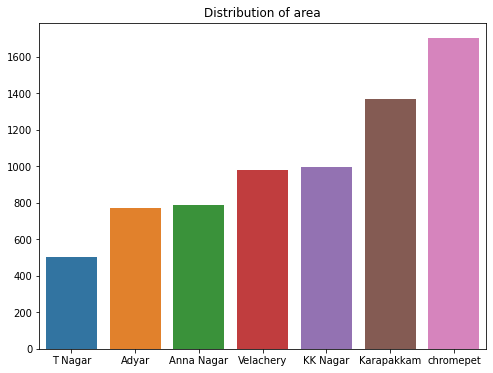

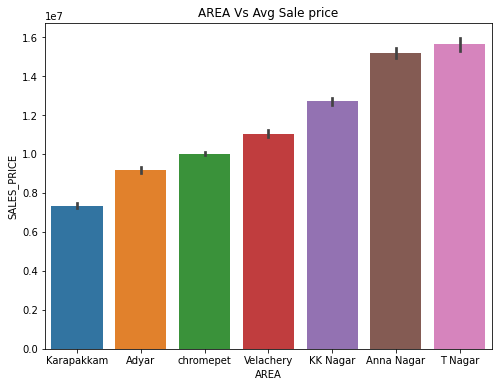

In [242]:
plt.figure(figsize=(8,6))
feature_data=df["AREA"].value_counts(ascending=True)
sns.barplot(x=feature_data.index,y=feature_data.values,data=df)
title1 = "Distribution of area"
plt.title(title1)

plt.figure(figsize=(8,6))
sns.barplot(x = df['AREA'],y=df['SALES_PRICE'],order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
title2 = "AREA Vs Avg Sale price"
plt.title(title2)

Text(0.5, 1.0, 'SALE_COND Vs Avg Sale price')

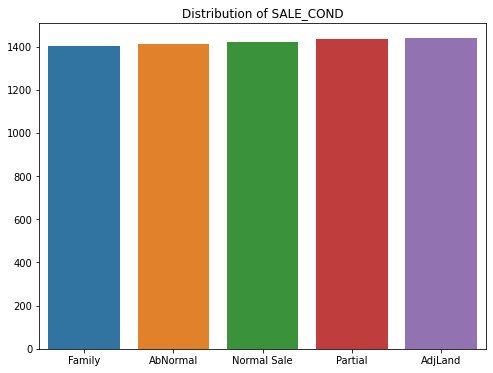

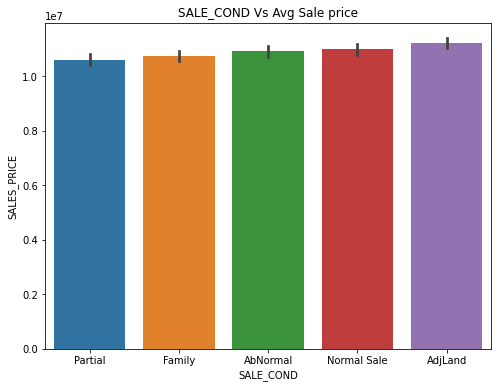

In [243]:
plt.figure(figsize=(8,6))
feature_data=df["SALE_COND"].value_counts(ascending=True)
sns.barplot(x=feature_data.index,y=feature_data.values,data=df)
title1 = "Distribution of SALE_COND"
plt.title(title1)

plt.figure(figsize=(8,6))
sns.barplot(x = df['SALE_COND'],y=df['SALES_PRICE'],order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
title2 = "SALE_COND Vs Avg Sale price"
plt.title(title2)

Text(0.5, 1.0, 'PARK_FACIL Vs Avg Sale price')

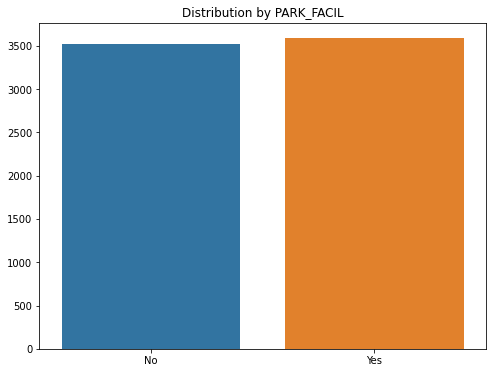

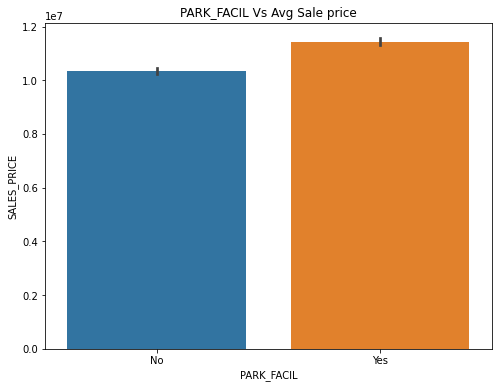

In [244]:
plt.figure(figsize=(8,6))
feature_data=df["PARK_FACIL"].value_counts(ascending=True)
sns.barplot(x=feature_data.index,y=feature_data.values,data=df)
title1 = "Distribution by PARK_FACIL"
plt.title(title1)

plt.figure(figsize=(8,6))
sns.barplot(x = df['PARK_FACIL'],y=df['SALES_PRICE'],order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
title2 = "PARK_FACIL Vs Avg Sale price"
plt.title(title2)


Text(0.5, 1.0, 'BUILDTYPE Vs Avg Sale price')

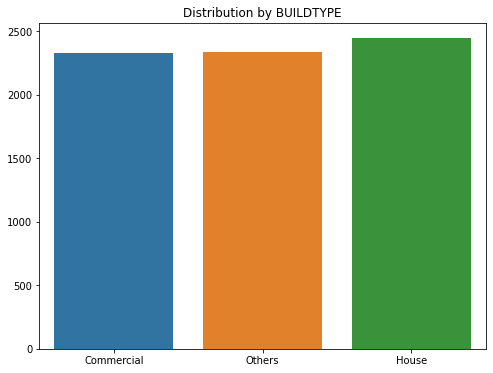

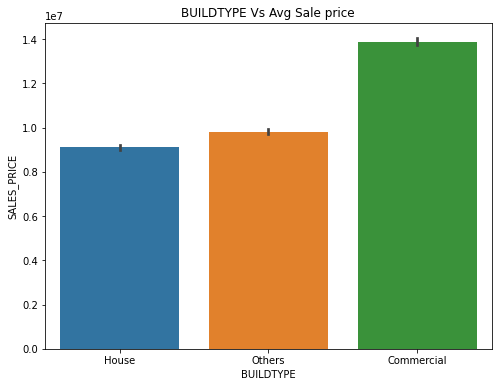

In [245]:
plt.figure(figsize=(8,6))
feature_data=df["BUILDTYPE"].value_counts(ascending=True)
sns.barplot(x=feature_data.index,y=feature_data.values,data=df)
title1 = "Distribution by BUILDTYPE"
plt.title(title1)

plt.figure(figsize=(8,6))
sns.barplot(x = df['BUILDTYPE'],y=df['SALES_PRICE'],order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
title2 = "BUILDTYPE Vs Avg Sale price"
plt.title(title2)

Text(0.5, 1.0, 'UTILITY_AVAIL Vs Avg Sale price')

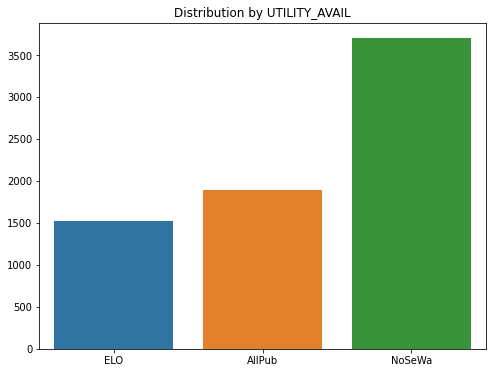

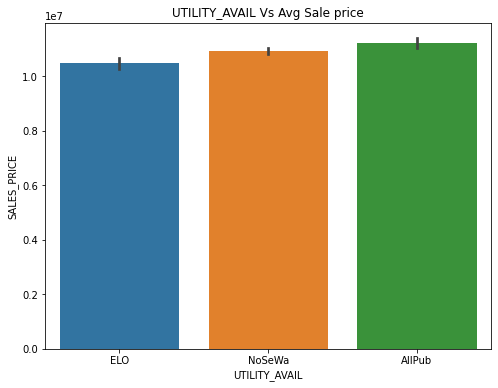

In [246]:
plt.figure(figsize=(8,6))
feature_data=df["UTILITY_AVAIL"].value_counts(ascending=True)
sns.barplot(x=feature_data.index,y=feature_data.values,data=df)
title1 = "Distribution by UTILITY_AVAIL"
plt.title(title1)

plt.figure(figsize=(8,6))
sns.barplot(x = df['UTILITY_AVAIL'],y=df['SALES_PRICE'],order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
title2 = "UTILITY_AVAIL Vs Avg Sale price"
plt.title(title2)

Text(0.5, 1.0, 'STREET Vs Avg Sale price')

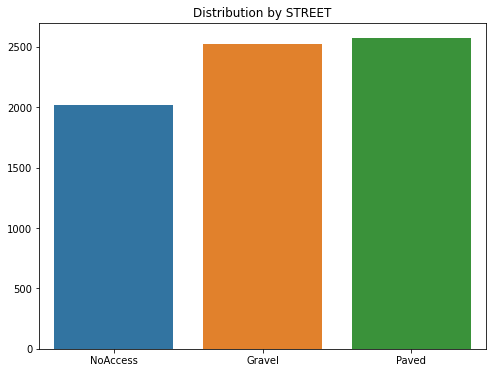

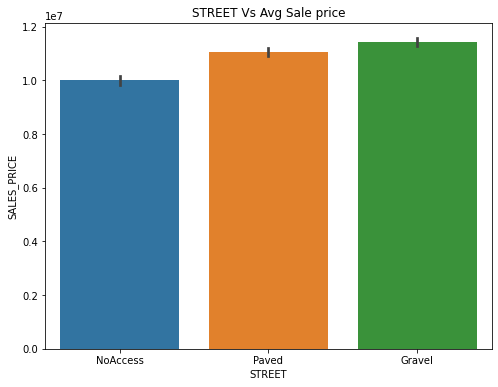

In [247]:
plt.figure(figsize=(8,6))
feature_data=df["STREET"].value_counts(ascending=True)
sns.barplot(x=feature_data.index,y=feature_data.values,data=df)
title1 = "Distribution by STREET"
plt.title(title1)

plt.figure(figsize=(8,6))
sns.barplot(x = df['STREET'],y=df['SALES_PRICE'],order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
title2 = "STREET Vs Avg Sale price"
plt.title(title2)

Text(0.5, 1.0, 'MZZONE Vs Avg Sale price')

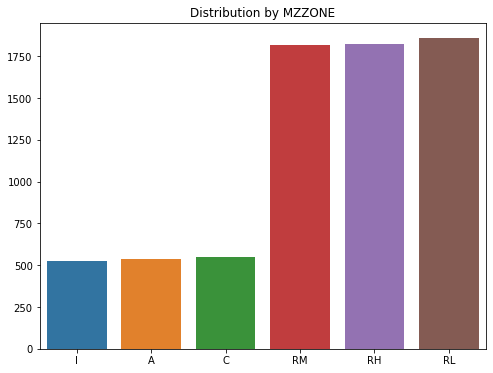

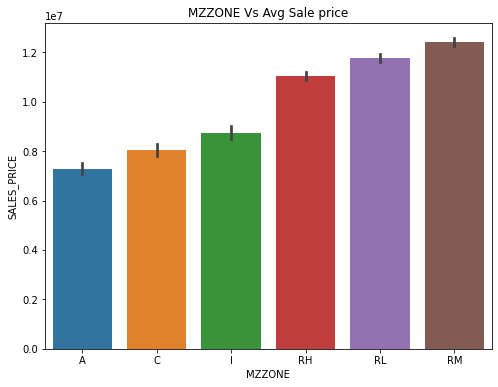

In [248]:
plt.figure(figsize=(8,6))
feature_data=df["MZZONE"].value_counts(ascending=True)
sns.barplot(x=feature_data.index,y=feature_data.values,data=df)
title1 = "Distribution by MZZONE"
plt.title(title1)

plt.figure(figsize=(8,6))
sns.barplot(x = df['MZZONE'],y=df['SALES_PRICE'],order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
title2 = "MZZONE Vs Avg Sale price"
plt.title(title2)


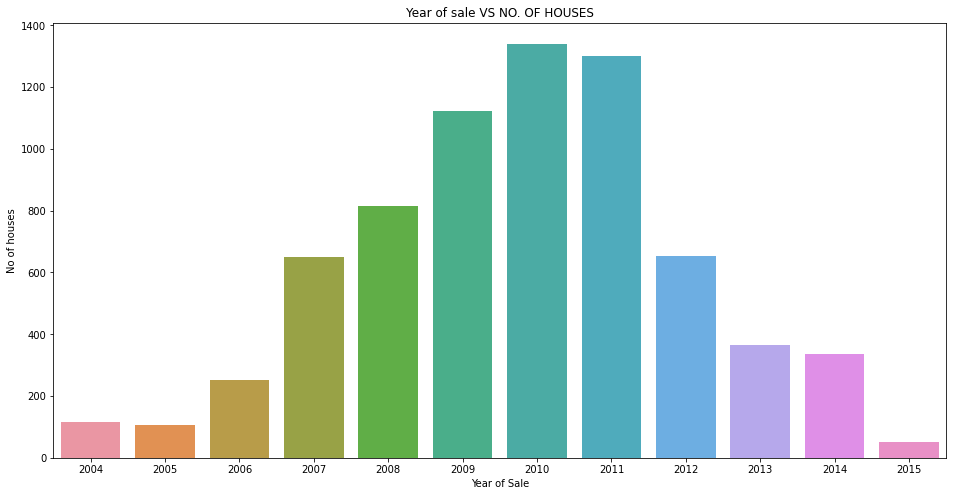

In [249]:
plt.figure(figsize=(16,8))
build=df['DATE_SALE'].value_counts()
sns.barplot(x=build.index,y=build.values,data=df)
plt.xlabel("Year of Sale")
plt.ylabel("No of houses")
plt.title('Year of sale VS NO. OF HOUSES')
plt.show()

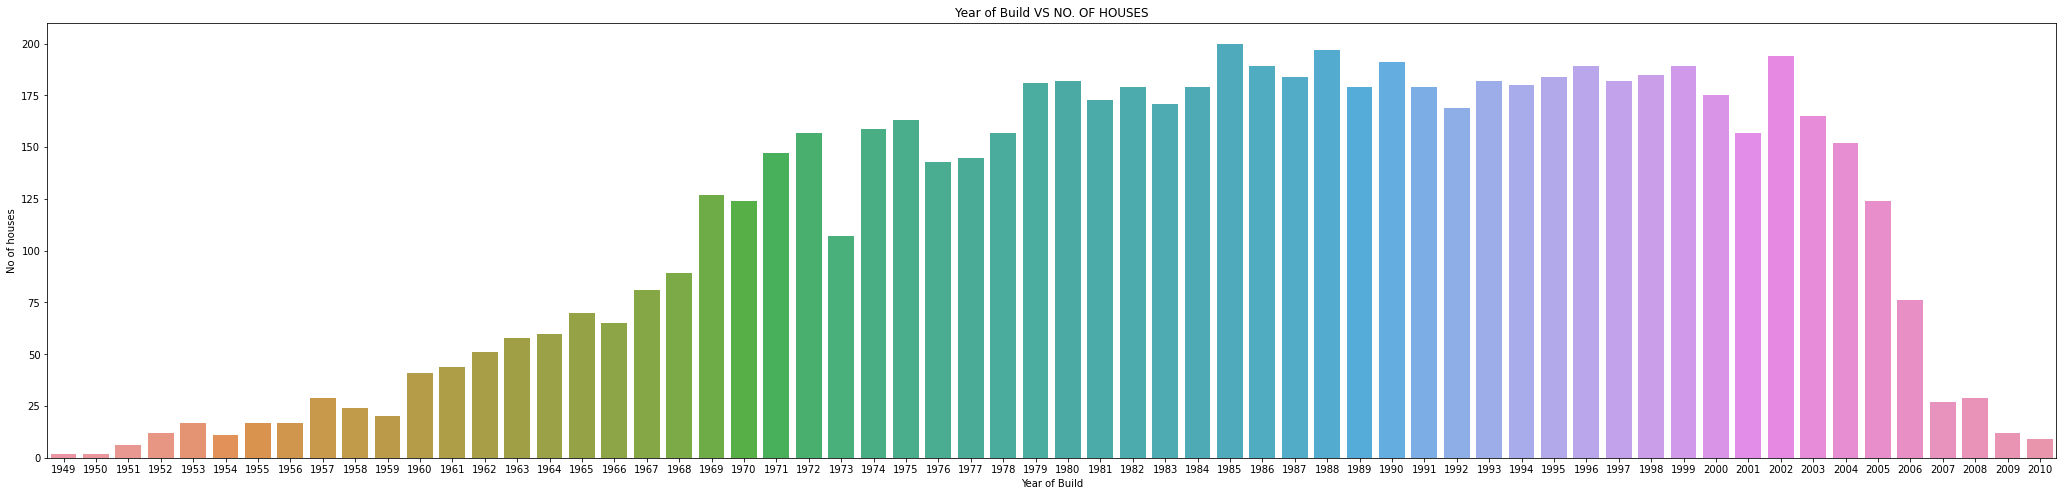

In [250]:
plt.figure(figsize=(36,8))
build=df['DATE_BUILD'].value_counts()
sns.barplot(x=build.index,y=build.values,data=df)
plt.xlabel("Year of Build")
plt.ylabel("No of houses")
plt.title('Year of Build VS NO. OF HOUSES')
plt.show()

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PRT_ID           7109 non-null   object 
 1   AREA             7109 non-null   object 
 2   INT_SQFT         7109 non-null   int64  
 3   DATE_SALE        7109 non-null   int64  
 4   DIST_MAINROAD    7109 non-null   int64  
 5   N_BEDROOM        7109 non-null   int64  
 6   N_BATHROOM       7109 non-null   int64  
 7   N_ROOM           7109 non-null   int64  
 8   SALE_COND        7109 non-null   object 
 9   PARK_FACIL       7109 non-null   object 
 10  DATE_BUILD       7109 non-null   int64  
 11  BUILDTYPE        7109 non-null   object 
 12  UTILITY_AVAIL    7109 non-null   object 
 13  STREET           7109 non-null   object 
 14  MZZONE           7109 non-null   object 
 15  QS_ROOMS         7109 non-null   float64
 16  QS_BATHROOM      7109 non-null   float64
 17  QS_BEDROOM    

**Droping features**

In [252]:
df.drop(["REG_FEE","COMMIS","DATE_SALE","DATE_BUILD"],axis=1,inplace=True)
#"REG_FEE","COMMIS" is apply after sale price,and "DATE_SALE","DATE_BUILD" is not relevant for sale price

In [253]:
df.drop("PRT_ID",axis=1,inplace=True)
#unique values not requred

In [254]:
df.corr()['SALES_PRICE']

INT_SQFT           0.612125
DIST_MAINROAD      0.018783
N_BEDROOM          0.330987
N_BATHROOM         0.108834
N_ROOM             0.602760
QS_ROOMS           0.021967
QS_BATHROOM       -0.011377
QS_BEDROOM         0.018804
QS_OVERALL         0.020485
SALES_PRICE        1.000000
Age_of_building   -0.118842
Name: SALES_PRICE, dtype: float64

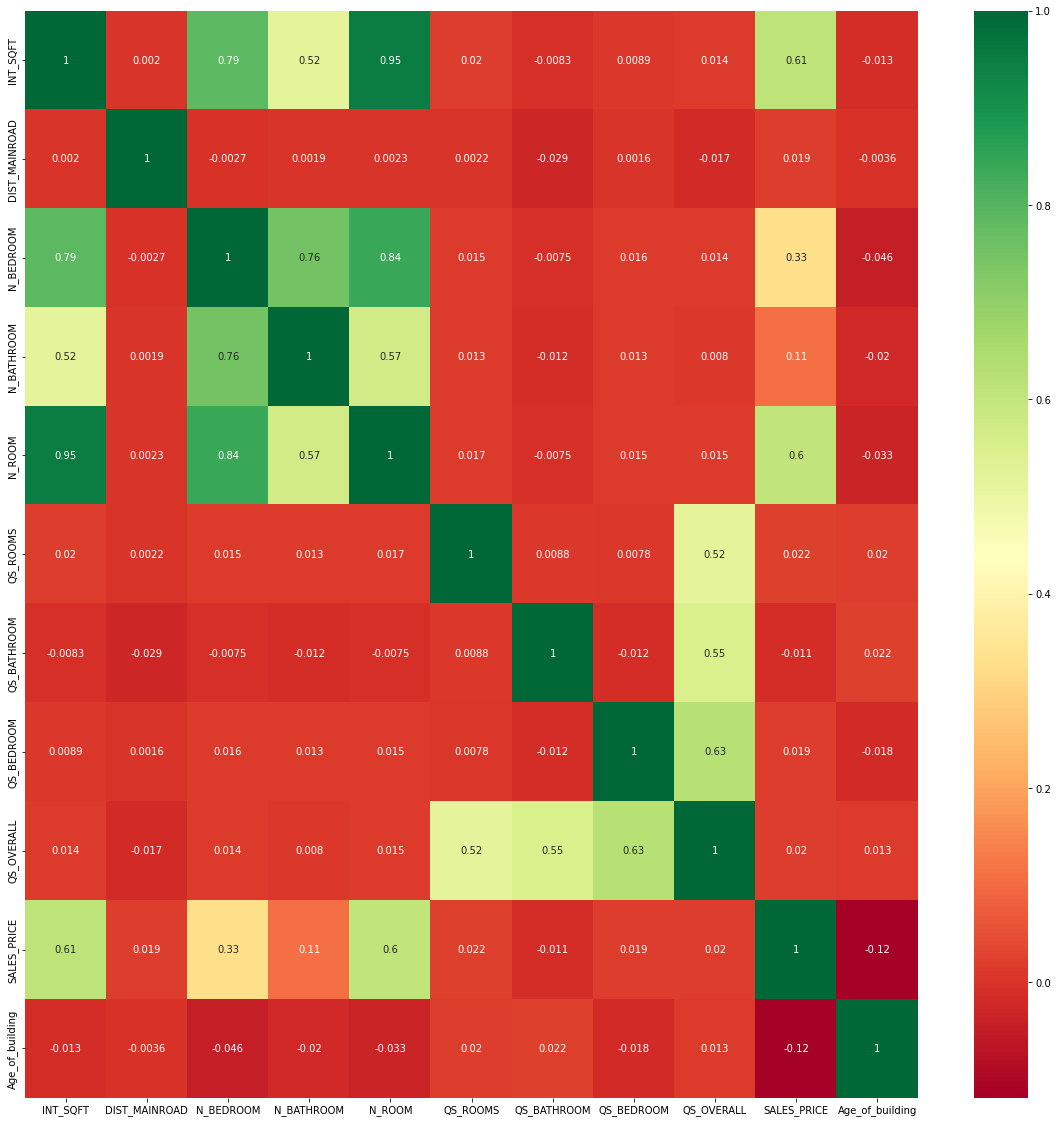

In [255]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [256]:
df.drop(['DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',"QS_OVERALL"], axis=1, inplace=True)

Encoding

In [257]:
# AREA          -> Nominal ==one hot
# SALE_COND     -> Nominal ==one hot
# PARK_FACIL    -> ordinal ==label
# BUILDTYPE     -> Nominal ==one hot
# UTILITY_AVAIL -> Nominal ==one hot
# STREET        -> Nominal ==one hot
# MZZONE        -> Nominal ==one hot

In [258]:
area=pd.get_dummies(df["AREA"], drop_first=True) #1

In [259]:
sale_cond=pd.get_dummies(df["SALE_COND"], drop_first=True) #2

In [260]:
buildtype=pd.get_dummies(df["BUILDTYPE"], drop_first=True)#3

In [261]:
utility_avail=pd.get_dummies(df["UTILITY_AVAIL"], drop_first=True)#4

In [262]:
mzzone=pd.get_dummies(df["MZZONE"], drop_first=True)#5

In [263]:
street=pd.get_dummies(df["STREET"], drop_first=True)#6

In [264]:
#add to main df
df=pd.concat([df,area,sale_cond,buildtype,utility_avail,mzzone,street],axis=1)

In [265]:
#drop old clm
df.drop(["AREA","SALE_COND","BUILDTYPE","UTILITY_AVAIL","MZZONE","STREET"],axis=1,inplace=True)

In [266]:
df['PARK_FACIL'] = df['PARK_FACIL'].map({'No':0,'Yes':1})

In [267]:
df.head(5)

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,SALES_PRICE,Age_of_building,Anna Nagar,KK Nagar,Karapakkam,...,Others,ELO,NoSeWa,C,I,RH,RL,RM,NoAccess,Paved
0,1004,1,1,3,1,7600000,44,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1986,2,1,5,0,21717770,11,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,909,1,1,3,1,13159200,20,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1855,3,2,5,0,9630290,22,0,0,0,...,1,0,1,0,1,0,0,0,0,1
4,1226,1,1,3,1,7406250,30,0,0,1,...,1,0,0,1,0,0,0,0,0,0


In [268]:
X=df.drop(["SALES_PRICE"],axis=1)
y=df["SALES_PRICE"]

**Splitting the training and testing Dataset.**

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=10)

**Scaling the data**

In [270]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [271]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 27), (1422, 27), (5687,), (1422,))

**Linear Regression**

In [272]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9554672988610996

**K Nearest Neighbour**

In [273]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsRegressor(i)               
  knn.fit(X_train, y_train)
  print("K value  :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  : 1 Cross Value Accuracy : 0.7104221874556126
K value  : 2 Cross Value Accuracy : 0.776471655175125
K value  : 3 Cross Value Accuracy : 0.7959118184507877
K value  : 4 Cross Value Accuracy : 0.7989528158172382
K value  : 5 Cross Value Accuracy : 0.8020768977053525
K value  : 6 Cross Value Accuracy : 0.8006619417827665
K value  : 7 Cross Value Accuracy : 0.798248126589508
K value  : 8 Cross Value Accuracy : 0.7962986463554098
K value  : 9 Cross Value Accuracy : 0.7946235087423081
K value  : 10 Cross Value Accuracy : 0.7920850492748241
K value  : 20 Cross Value Accuracy : 0.7790194422217762
K value  : 30 Cross Value Accuracy : 0.7658267052895359
K value  : 40 Cross Value Accuracy : 0.7559849461719808
K value  : 50 Cross Value Accuracy : 0.7480071637007393


**Decision Tree**

In [274]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,40]:
  dt= DecisionTreeRegressor(max_depth= depth,random_state=0)
  dt.fit(X_train, y_train)
  accuracy= r2_score(y_test,dt.predict(X_test))
  val= cross_val_score(dt, X, y, cv=10)
  print('K:',depth,'R2 Score:',accuracy,'Cross Val Score:',np.mean(val))

K: 1 R2 Score: 0.32063988560410317 Cross Val Score: 0.30713886240518135
K: 2 R2 Score: 0.4775069244135146 Cross Val Score: 0.4629382190421337
K: 3 R2 Score: 0.6626536290523246 Cross Val Score: 0.655192967107995
K: 4 R2 Score: 0.7839084846810908 Cross Val Score: 0.7759278227173768
K: 5 R2 Score: 0.8620914023618858 Cross Val Score: 0.8571701394502849
K: 6 R2 Score: 0.9028552746270638 Cross Val Score: 0.8987686524387174
K: 7 R2 Score: 0.9269817378024848 Cross Val Score: 0.9272642634171755
K: 8 R2 Score: 0.9416266501310588 Cross Val Score: 0.9430485146223493
K: 9 R2 Score: 0.9512257673125114 Cross Val Score: 0.9535972459007029
K: 10 R2 Score: 0.9569609719961655 Cross Val Score: 0.9598602262362073
K: 20 R2 Score: 0.9583818975342601 Cross Val Score: 0.9652742394518119
K: 40 R2 Score: 0.9574296334037162 Cross Val Score: 0.9649721561808265


In [275]:
dt= DecisionTreeRegressor(max_depth= 10,random_state=0)
dt.fit(X_train, y_train)  # area, int_sqft, commericial buildtype, mzzone , park_facl
# Get numerical feature importances
importances = list(dt.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('INT_SQFT', 0.39),
 ('Others', 0.2),
 ('House', 0.13),
 ('Karapakkam', 0.12),
 ('Velachery', 0.06),
 ('KK Nagar', 0.03),
 ('PARK_FACIL', 0.02),
 ('RM', 0.02),
 ('RH', 0.01),
 ('RL', 0.01),
 ('NoAccess', 0.01),
 ('N_BEDROOM', 0.0),
 ('N_BATHROOM', 0.0),
 ('N_ROOM', 0.0),
 ('Age_of_building', 0.0),
 ('Anna Nagar', 0.0),
 ('T Nagar', 0.0),
 ('chromepet', 0.0),
 ('AdjLand', 0.0),
 ('Family', 0.0),
 ('Normal Sale', 0.0),
 ('Partial', 0.0),
 ('ELO', 0.0),
 ('NoSeWa', 0.0),
 ('C', 0.0),
 ('I', 0.0),
 ('Paved', 0.0)]

In [276]:
dt= DecisionTreeRegressor(max_depth= 10,random_state=0)
dt.fit(X_train, y_train)
pred= dt.predict(X_test)
accuracy= r2_score(y_test,pred)
print(accuracy)

0.9569609719961655


**Random Forest Regression**

In [277]:
max_depth=np.arange(4,20)
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  4 cross_val_score :  0.7907087266939276
Depth :  5 cross_val_score :  0.884597288306005
Depth :  6 cross_val_score :  0.9196860963425585
Depth :  7 cross_val_score :  0.9454909912491789
Depth :  8 cross_val_score :  0.9600428452151546
Depth :  9 cross_val_score :  0.9694410512475536
Depth :  10 cross_val_score :  0.9748800372769251
Depth :  11 cross_val_score :  0.9780578403218663
Depth :  12 cross_val_score :  0.9796964744595044
Depth :  13 cross_val_score :  0.9805657843275983
Depth :  14 cross_val_score :  0.9809641383859804
Depth :  15 cross_val_score :  0.9809631110200033
Depth :  16 cross_val_score :  0.9809995016724808
Depth :  17 cross_val_score :  0.9809980128940984
Depth :  18 cross_val_score :  0.9810223635583075
Depth :  19 cross_val_score :  0.9810079226966374


In [278]:
cross_val_rf_regressor=max(cross_val_rf)
print(cross_val_rf_regressor)

0.9810223635583075


In [279]:
rf_regressor=RandomForestRegressor(max_depth=18, random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=18, random_state=0)

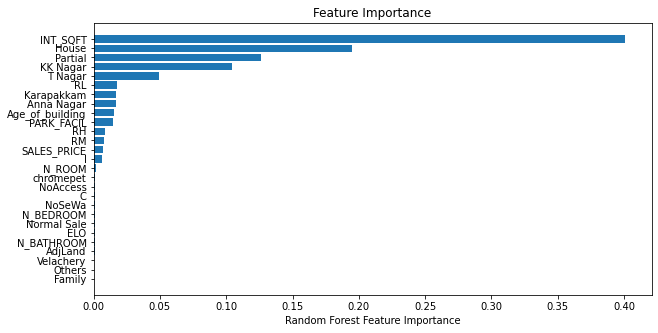

In [280]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

XG BOOST REGRESSOR

In [281]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.20,0.30,0.50,0.70,0.90,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_test,y_test), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train,cv=10)))

Learning rate :  0.05  Train score :  0.9567152570120974  Cross-Val score :  0.9518564368611863
Learning rate :  0.06  Train score :  0.9657636303239002  Cross-Val score :  0.9629844941476964
Learning rate :  0.07  Train score :  0.9727919064531657  Cross-Val score :  0.9694475783846773
Learning rate :  0.08  Train score :  0.9787837850496105  Cross-Val score :  0.9744809939609034
Learning rate :  0.09  Train score :  0.9806287541289679  Cross-Val score :  0.9779030780102917
Learning rate :  0.1  Train score :  0.9818762522456393  Cross-Val score :  0.9802201430080679
Learning rate :  0.11  Train score :  0.9844837226446437  Cross-Val score :  0.9820062639264187
Learning rate :  0.12  Train score :  0.9860354588373713  Cross-Val score :  0.9841937268300878
Learning rate :  0.13  Train score :  0.9876437874591403  Cross-Val score :  0.9855382902556331
Learning rate :  0.14  Train score :  0.988155737922024  Cross-Val score :  0.9863481681592756
Learning rate :  0.15  Train score :  0.98

In [282]:
model = xgb.XGBRegressor(learning_rate = 0.5, n_estimators=100, verbosity = 0)
model.fit(X_train,y_train)

# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(list(X.columns), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('Anna Nagar', 0.16919),
 ('T Nagar', 0.15261),
 ('Others', 0.12258),
 ('Velachery', 0.0933),
 ('Karapakkam', 0.08984),
 ('House', 0.08853),
 ('INT_SQFT', 0.07311),
 ('RM', 0.03988),
 ('PARK_FACIL', 0.03296),
 ('NoAccess', 0.02773),
 ('N_ROOM', 0.02699),
 ('RL', 0.01822),
 ('RH', 0.01416),
 ('Paved', 0.0086),
 ('KK Nagar', 0.00768),
 ('N_BEDROOM', 0.0068),
 ('Partial', 0.00567),
 ('AdjLand', 0.00521),
 ('NoSeWa', 0.00306),
 ('Age_of_building', 0.00297),
 ('C', 0.00245),
 ('I', 0.00244),
 ('Family', 0.00179),
 ('ELO', 0.00168),
 ('N_BATHROOM', 0.00114),
 ('chromepet', 0.00075),
 ('Normal Sale', 0.00066)]

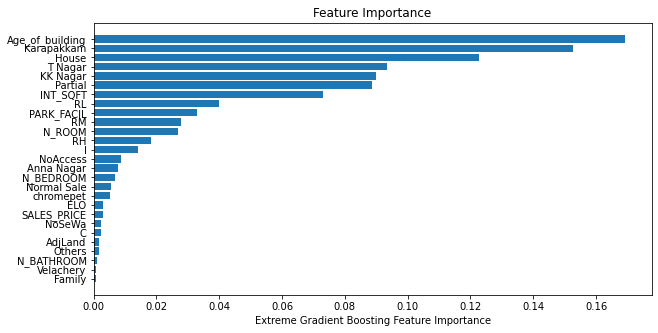

In [283]:
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

# Score for Linear Regression : 95%
# Score for KNN : 80%
# Score for Decision Tree Regressor : 95%
# Score for Random Forest Regressor : 98%
# Score for XGBoost Regressor : 99%



#Answers to Buyers and suggestions to Real Estate Agents:

Price of the property changes due to various factors. Top factors are:

1)Based on size(SQRF) of property.

2)Based on the location of the property.

3)Property age.

#Suggestions to Real estate agents:

Profit can be increased by considering the following factors:

1)It is recommended to construct a House bulding rather than Commercial or others.

2)Constructing buildings in Karapakkam, T Nagar and KK Nagar can result in more profit.

3)It is highly recommended Sale condition should be pertial.
